In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

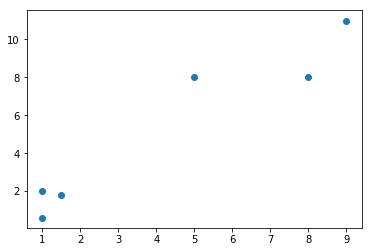

In [19]:
plt.scatter(x[:,0],x[:,1])

In [68]:
arr = np.array([[1,2],[3,4]])
np.average(arr,axis=0)

array([2., 3.])

In [107]:
def fit(data,k=2,max_iter=100): # k is the number of clusters 
    means=[]
    # randomly assign the means
    for i in range(k):
        means.append(data[i])
    for i in range(max_iter):
        # assign data points to the clusters that they belong to
        # create empty clusters
        clusters=[]
        for j in range(k):
            clusters.append([])
        for point in data:
            # Find distance to all the k mean values(initialized)
            distances = [((point-m)**2).sum() for m in means]
            # Find the minimum distance 
            minDistance = min(distances)
            # Find the mean for which we got the minimum distance (eg: 1) 
            l = distances.index(minDistance)
            # Assign point to that cluster -> 1
            clusters[l].append(point)
        
        change = False
        # calculate new mean values
        for j in range(k):
            new_mean = np.average(clusters[j],axis=0) # get average of x and y coordinates seperately
            # check to see if the new_mean and previous mean values are same or not
            # if same then stop early
            if not np.array_equal(new_mean,means[j]):
                change = True
            means[j] = new_mean
        if change == False:
            break
    return means

In [108]:
means = fit(x)
means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

In [109]:
def predict(test_data,means):
    predictions = []
    for point in test_data:
        # find distance of point from mean
        distances = [((m-point)**2).sum() for m in means]
        # find min distance mean
        minDistance = min(distances)
        # find index of that cluster
        l = distances.index(minDistance)
        # add this point to cluster and index of cluster to predictions
        predictions.append(l)
    return predictions

In [110]:
predict(x,means)

[0, 0, 1, 1, 0, 1]

## Giving it a OOPS Structure 

In [111]:
class K_Means:
    
    def __init__(self,k=2,max_iter=100):
        print('constructed')
        self.k=k
        self.max_iter=max_iter
        
    def fit(self,data):
        self.means=[]
        # randomly assign the means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            # assign data points to the clusters that they belong to
            # create empty clusters
            clusters=[]
            for j in range(self.k):
                clusters.append([])
            for point in data:
                # Find distance to all the k mean values(initialized)
                distances = [((point-m)**2).sum() for m in self.means]
                # Find the minimum distance 
                minDistance = min(distances)
                # Find the mean for which we got the minimum distance (eg: 1) 
                l = distances.index(minDistance)
                # Assign point to that cluster -> 1
                clusters[l].append(point)

            change = False
            # calculate new mean values
            for j in range(self.k):
                new_mean = np.average(clusters[j],axis=0) # get average of x and y coordinates seperately
                # check to see if the new_mean and previous mean values are same or not
                # if same then stop early
                if not np.array_equal(new_mean,self.means[j]):
                    change = True
                self.means[j] = new_mean
            if change == False:
                break
    
    def predict(self,test_data):
        predictions = []
        for point in test_data:
            # find distance of point from mean
            distances = [((m-point)**2).sum() for m in self.means]
            # find min distance mean
            minDistance = min(distances)
            # find index of that cluster
            l = distances.index(minDistance)
            # add this point to cluster and index of cluster to predictions
            predictions.append(l)
        return predictions

In [112]:
kmeans = K_Means(2,10)

constructed


In [113]:
means = kmeans.fit(x)

In [114]:
kmeans.predict(x)

[0, 0, 1, 1, 0, 1]

In [116]:
kmeans.means,kmeans.max_iter,kmeans.k # attributes of K-Means object

([array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])], 10, 2)